## Ryan's Potential Flow Code of Sources

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
class vortex(object):
    """Vortex element for potential flow calculation."""
    def __init__(self, C, x0=0, y0=0):
        """Initialize vortex given strength and location."""
        self.C = C
        self.x0 = x0
        self.y0 = y0
    
    def __call__(self, x, y):
        """Evaluate u-v velocity due to vortex and provided x-y locations."""
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = (self.C / (2 * np.pi)) * -y_rel / rsq
        v = (self.C / (2 * np.pi)) * x_rel / rsq
        return np.stack((u, v), axis=-1)

In [4]:
class sourcesink(object):
    """Source/sink element for potential flow calculation."""
    def __init__(self, C, x0=0, y0=0):
        """Initialize source/sink given strength and location."""
        self.C = C
        self.x0 = x0
        self.y0 = y0
    
    def __call__(self, x, y):
        """Evaluate u-v velocity due to source/sink and provided x-y locations."""
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = (self.C / (2 * np.pi)) * x_rel / rsq
        v = (self.C / (2 * np.pi)) * y_rel / rsq
        return np.stack((u, v), axis=-1)

In [5]:
x = np.linspace(0, 10, 8)
y = np.linspace(0, 10, 8)
X, Y = np.meshgrid(x, y)

In [34]:
vtx0 = vortex(2, 2.5, 5)
vtx1 = vortex(-3, 7.5, 5)
src = sourcesink(2, 5, 5)
snk = sourcesink(-1, 8, 2)
UV = vtx0(X, Y) + vtx1(X, Y) + src(X, Y) + snk(X, Y)

<IPython.core.display.Javascript object>


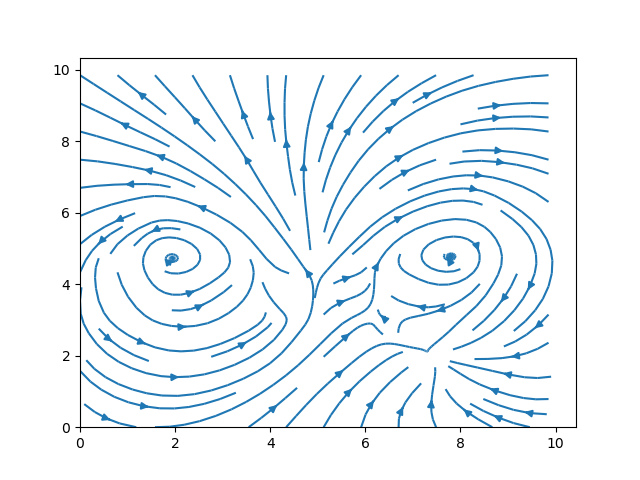

In [35]:
fig, ax = plt.subplots()
ax.streamplot(x, y, UV[..., 0], UV[..., 1])